<a href="https://colab.research.google.com/github/AlejandroGutie/G04-ME04-Avance-Monografia/blob/main/ME04_Desnutrici%C3%B3n_e_inseguridad_alimentaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Especialización en Analítica y Ciencia de Datos
### Monografía
### Gestión de datos

## _Aplicación de Ciencia de datos sobre la desnutrición e inseguridad alimentaria en los municipios de Antioquia en el marco del segundo Objetivo de Desarrollo Sostenible, 2013 -  2022._

**Autores**\
Huberth Rolando Hincapié Arango\
Yeisson Alejandro Gutiérrez Cano

# Herramientas

## Librerías

In [1]:
# Datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt

# Matemáticas y estadísticas
# ==============================================================================
import math
from collections import Counter

# Exportar datos
# ==============================================================================
from google.colab import files



# Procesamiento de datos

## Importación de datos

In [2]:
!gdown '12AMhKRv6LOYgSduVF_OHAncPcYQLosdW' -O /tmp/BDIndicadores.csv

Downloading...
From: https://drive.google.com/uc?id=12AMhKRv6LOYgSduVF_OHAncPcYQLosdW
To: /tmp/BDIndicadores.csv
100% 43.1M/43.1M [00:00<00:00, 68.9MB/s]


In [3]:
baseCompleta = pd.read_csv('/tmp/BDIndicadores.csv', encoding='ISO-8859-1', sep=';')
col_names = baseCompleta.columns.tolist()
#print(col_names)
# se podrían requerir los campos de SUBREGION para agregar info: 'Código subregión', 'Subregión',
dataset = baseCompleta[[ 'Código entidad', 'Entidad', 'Año', 'Indicador', 'Valor']]

<ipython-input-3-d8a3d410e32a>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  baseCompleta = pd.read_csv('/tmp/BDIndicadores.csv', encoding='ISO-8859-1', sep=';')


In [4]:
#print(dataset)
df_pivot=dataset.pivot_table(index=['Código entidad', 'Entidad', 'Año'], columns='Indicador', values='Valor').reset_index()
# Eliminar la columna 'index'
#df_pivot.drop(columns=['index'], inplace=True)
df_pivot.head(20)

Indicador,Código entidad,Entidad,Año,Brecha de ingreso mensual promedio entre hombres y mujeres,Brecha de pobreza extrema urbano-rural,Brecha entre cobertura neta urbano-rural en educación básica y media,Capacidad instalada de generación de energía eléctrica,Cobertura de establecimientos financieros,Cobertura de vacunación con BCG en nacidos vivos,Cobertura de viviendas con agua potable,...,Tasa de violencia de pareja,Tasa de víctimas (directas e indirectas) de homicidio o desaparición forzada registradas en el Registro Único de Víctimas,Valor agregado de la industria manufacturera,Valor de ingresos laborales como porcentaje del Producto Interno Bruto (PIB),Vehículos eléctricos e híbridos matriculados,Índice de Pobreza Multidimensional (IPM),Índice de bancarización,Índice de riesgo de la calidad del agua (IRCA),Índice de riesgo de la calidad del agua (IRCA) Rural,Índice de riesgo de la calidad del agua (IRCA) Urbano
0,5001,Medellín,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5001,Medellín,2010,NaN,NaN,-24.521204,7.03,3.746016,110.815615,NaN,...,NaN,32.760797,10193.737870,NaN,4.272340,NaN,84.223668,0.600000,3.100750,0.420000
2,5001,Medellín,2011,NaN,NaN,-29.127469,7.03,6.570680,116.438727,NaN,...,NaN,39.077518,11268.531860,NaN,3.939082,NaN,93.385783,0.600000,3.501125,0.530000
3,5001,Medellín,2012,NaN,NaN,-38.959540,7.03,11.244419,115.130513,NaN,...,17.788743,24.233607,11131.966200,NaN,3.692916,NaN,94.080123,0.600000,0.600000,0.400000
4,5001,Medellín,2013,19.381305,1.658296,-38.277198,7.03,13.800588,106.594602,98.227862,...,76.033269,14.777441,11970.134940,NaN,3.469120,NaN,100.029149,0.600000,3.600000,0.000000
5,5001,Medellín,2014,NaN,NaN,-48.189070,7.03,20.846897,140.446495,98.537239,...,84.041622,1.831182,12069.814640,NaN,3.638142,NaN,92.726905,0.917482,1.323122,1.700000
6,5001,Medellín,2015,NaN,NaN,-56.153995,7.03,22.838942,151.023078,99.175273,...,104.782479,1.637373,11777.226890,NaN,12.784454,NaN,93.333024,0.600000,0.400000,0.700000
7,5001,Medellín,2016,NaN,NaN,-63.142564,7.03,23.163923,147.716389,99.104346,...,111.854746,1.446146,11843.045200,NaN,24.365030,NaN,109.123541,1.156000,1.156000,1.156000
8,5001,Medellín,2017,-0.231475,0.366505,-65.093212,7.03,23.714689,150.140786,99.824989,...,125.071789,0.545069,11861.868650,35.489736,36.823846,5.495199,114.996487,1.156000,2.600000,1.000000
9,5001,Medellín,2018,NaN,NaN,-71.665182,7.03,37.910586,140.330690,97.020284,...,222.824206,1.194827,12209.622490,35.377609,120.919333,NaN,117.666580,0.529000,0.690000,0.529000


In [5]:
df_pivot.describe()

Indicador,Código entidad,Año,Brecha de ingreso mensual promedio entre hombres y mujeres,Brecha de pobreza extrema urbano-rural,Brecha entre cobertura neta urbano-rural en educación básica y media,Capacidad instalada de generación de energía eléctrica,Cobertura de establecimientos financieros,Cobertura de vacunación con BCG en nacidos vivos,Cobertura de viviendas con agua potable,Cobertura de viviendas con agua potable (rural),...,Tasa de violencia de pareja,Tasa de víctimas (directas e indirectas) de homicidio o desaparición forzada registradas en el Registro Único de Víctimas,Valor agregado de la industria manufacturera,Valor de ingresos laborales como porcentaje del Producto Interno Bruto (PIB),Vehículos eléctricos e híbridos matriculados,Índice de Pobreza Multidimensional (IPM),Índice de bancarización,Índice de riesgo de la calidad del agua (IRCA),Índice de riesgo de la calidad del agua (IRCA) Rural,Índice de riesgo de la calidad del agua (IRCA) Urbano
count,1753.000000,1753.000000,497.000000,497.000000,1625.000000,1625.000000,1625.000000,1625.000000,1125.000000,1125.000000,...,1375.000000,1625.000000,1625.000000,500.000000,1625.000000,372.000000,1625.000000,1500.000000,1475.000000,1488.000000
mean,5416.185967,2015.363377,9.625440,1.631606,35.824398,39.768398,33.179910,52.428473,48.562717,13.419775,...,132.129217,39.035616,218.530680,33.015559,31.800014,18.957543,32.984906,22.737698,56.168577,4.718328
std,279.771073,4.286642,22.760642,2.854714,51.806436,168.592471,34.788462,58.710376,25.455504,21.987530,...,124.085756,103.425452,1076.632002,4.355538,130.759172,10.771114,34.489036,18.827139,31.062479,13.810602
min,5001.000000,2007.000000,-155.116244,0.000000,-195.173828,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.083089,18.877363,0.000000,1.264837,0.000000,0.000000,0.000000,0.000000
25%,5147.000000,2012.000000,2.248253,0.408716,8.895973,0.000000,8.841733,20.952381,33.039389,0.000000,...,45.320646,0.000000,7.892571,30.609675,0.000000,10.960123,10.297801,8.975000,32.805749,0.000000
50%,5376.000000,2016.000000,12.597277,1.064066,33.019733,0.000000,21.685943,36.231884,48.419261,1.209329,...,100.082677,0.000000,18.568569,32.948138,0.000000,16.654328,19.712033,18.900000,56.181541,0.880000
75%,5659.000000,2019.000000,22.598975,1.746349,58.407160,0.900000,45.474549,66.086957,64.761162,17.831814,...,188.042554,33.352789,47.696393,35.651828,0.000000,25.045718,45.336491,32.914224,85.202500,2.940000
max,5895.000000,2022.000000,64.527276,43.827010,418.117170,1466.900000,299.227799,597.727273,99.860009,99.400000,...,1256.106071,1453.957997,12209.622490,52.332404,2344.166223,56.413569,255.521760,100.000000,100.000000,100.000000


In [6]:
col_names = df_pivot.columns.tolist()
i = 0
#crear el diccionario
dictVars = {}
for c in col_names:
    if c == 'Incidencia de desnutrición aguda en población menor de 5 años':
        df_pivot.rename(columns = {c: 'O1'}, inplace = True)
        dictVars.update({'O1': c})
    elif c == 'Prevalencia de inseguridad alimentaria en el hogar (moderada o severa)':
        df_pivot.rename(columns = {c: 'O2'}, inplace = True)
        dictVars.update({'O2': c})
    elif c not in {'Código entidad', 'Entidad', 'Año'}:
        df_pivot.rename(columns = {c: 'V' + str(i)}, inplace = True)
        dictVars.update({'V' + str(i): c})
        i+=1
    elif c in {'Código entidad'}:
        df_pivot.rename(columns = {c: 'CodDane'}, inplace = True)
    elif c in {'Entidad'}:
        df_pivot.rename(columns = {c: 'Mpio'}, inplace = True)

#reordenar las columnas del dataframe: [AtributosDeIdentification]+[Año]+[96_Vars]+[Salidas]
# Lista con el nuevo orden de las columnas

#separar los conjuntos de variables
vIdentificacion = ['CodDane', 'Mpio']
vPrediccion =  [f'V{i}' for i in range(96)]
vSalida = ['O1', 'O2']

#new_columns_order = ['CodDane', 'Mpio', 'Año'] + [f'V{i}' for i in range(96)] + ['O1', 'O2']
new_columns_order = vIdentificacion + ['Año'] + vPrediccion + vSalida
# Reordenar las columnas del DataFrame
df_pivot = df_pivot[new_columns_order]

col_names = df_pivot.columns.tolist()
print(col_names)

['CodDane', 'Mpio', 'Año', 'V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'O1', 'O2']


In [7]:
df_pivot.describe()

Indicador,CodDane,Año,V0,V1,V2,V3,V4,V5,V6,V7,...,V88,V89,V90,V91,V92,V93,V94,V95,O1,O2
count,1753.000000,1753.000000,497.000000,497.000000,1625.000000,1625.000000,1625.000000,1625.000000,1125.000000,1125.000000,...,1625.000000,500.000000,1625.000000,372.000000,1625.000000,1500.000000,1475.000000,1488.000000,750.000000,500.000000
mean,5416.185967,2015.363377,9.625440,1.631606,35.824398,39.768398,33.179910,52.428473,48.562717,13.419775,...,218.530680,33.015559,31.800014,18.957543,32.984906,22.737698,56.168577,4.718328,227.491591,26.651671
std,279.771073,4.286642,22.760642,2.854714,51.806436,168.592471,34.788462,58.710376,25.455504,21.987530,...,1076.632002,4.355538,130.759172,10.771114,34.489036,18.827139,31.062479,13.810602,295.224568,13.882069
min,5001.000000,2007.000000,-155.116244,0.000000,-195.173828,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.083089,18.877363,0.000000,1.264837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5147.000000,2012.000000,2.248253,0.408716,8.895973,0.000000,8.841733,20.952381,33.039389,0.000000,...,7.892571,30.609675,0.000000,10.960123,10.297801,8.975000,32.805749,0.000000,0.000000,17.242105
50%,5376.000000,2016.000000,12.597277,1.064066,33.019733,0.000000,21.685943,36.231884,48.419261,1.209329,...,18.568569,32.948138,0.000000,16.654328,19.712033,18.900000,56.181541,0.880000,144.225855,25.082549
75%,5659.000000,2019.000000,22.598975,1.746349,58.407160,0.900000,45.474549,66.086957,64.761162,17.831814,...,47.696393,35.651828,0.000000,25.045718,45.336491,32.914224,85.202500,2.940000,323.681217,33.800872
max,5895.000000,2022.000000,64.527276,43.827010,418.117170,1466.900000,299.227799,597.727273,99.860009,99.400000,...,12209.622490,52.332404,2344.166223,56.413569,255.521760,100.000000,100.000000,100.000000,3533.568905,76.648924


In [8]:
#print(f'número de columnas:{i}')
#print(dictVars['V1'])
#print(df_pivot.head(10))
#print(df_pivot.describe())
print(df_pivot.dtypes)

#ajustar los códigos dane
# Convertir la columna CodDane a cadena de texto y rellenar con ceros a la izquierda
df_pivot['CodDane'] = df_pivot['CodDane'].astype(str).str.zfill(5)

# Verificar los primeros elementos de la columna CodDane
print(df_pivot['CodDane'].head())

#verificar el df
print(df_pivot.describe())

Indicador
CodDane      int64
Mpio        object
Año          int64
V0         float64
V1         float64
            ...   
V93        float64
V94        float64
V95        float64
O1         float64
O2         float64
Length: 101, dtype: object
0    05001
1    05001
2    05001
3    05001
4    05001
Name: CodDane, dtype: object
Indicador          Año          V0          V1           V2           V3  \
count      1753.000000  497.000000  497.000000  1625.000000  1625.000000   
mean       2015.363377    9.625440    1.631606    35.824398    39.768398   
std           4.286642   22.760642    2.854714    51.806436   168.592471   
min        2007.000000 -155.116244    0.000000  -195.173828     0.000000   
25%        2012.000000    2.248253    0.408716     8.895973     0.000000   
50%        2016.000000   12.597277    1.064066    33.019733     0.000000   
75%        2019.000000   22.598975    1.746349    58.407160     0.900000   
max        2022.000000   64.527276   43.827010   418.117170  1

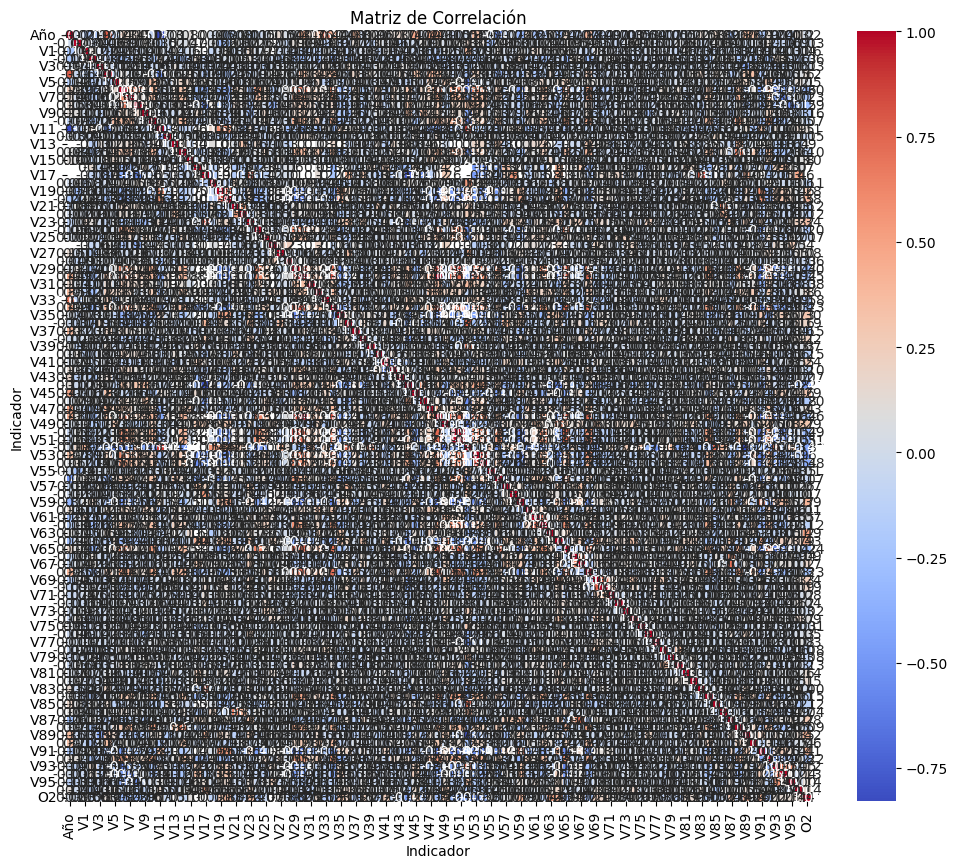

In [9]:
# correlacion y RD(PCA), Referencias

## 1.Análisis Exploratorio de Datos (EDA): *******************************************************

#*********************************************************************************
#Matriz de correlación ***********************************************************
#*********************************************************************************
#
# Realmente no sirve es muy denso !!!!!!!!!!
#



# Filtrar las muestras donde el año sea igual a 2017
df_pivot_cleaned = df_pivot.loc[df_pivot['Año'] >= 0]

# Eliminar las columnas que son completamente NaN
df_pivot_cleaned = df_pivot_cleaned.dropna(subset=df_pivot_cleaned.columns.difference(['Año']), axis=0, how='all')
df_pivot_cleaned = df_pivot_cleaned.dropna(axis=1, how='all')

# Eliminar las columnas no numéricas si las hay
df_numeric = df_pivot_cleaned.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()
#********************************************************************************
#*********************************************************************************

In [ ]:
## ---- pendiente de revision esta celda

# Assuming 'correlation_matrix' is your correlation matrix DataFrame
# Replace it with the actual variable holding your correlation matrix

# Set your threshold
threshold = 0.9  # Adjust this value based on your requirements

# Filter correlations above the threshold
notable_correlations = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

# Stack the DataFrame to keep only non-null correlations
notable_correlations = notable_correlations.stack().reset_index()
notable_correlations.columns = ['V0', 'V1', 'Correlation']

# Sort by absolute correlation value
notable_correlations = notable_correlations.iloc[notable_correlations['Correlation'].abs().argsort()[::-1]]

# Display the most notable correlations
print(notable_correlations)

# Drop de N vbles


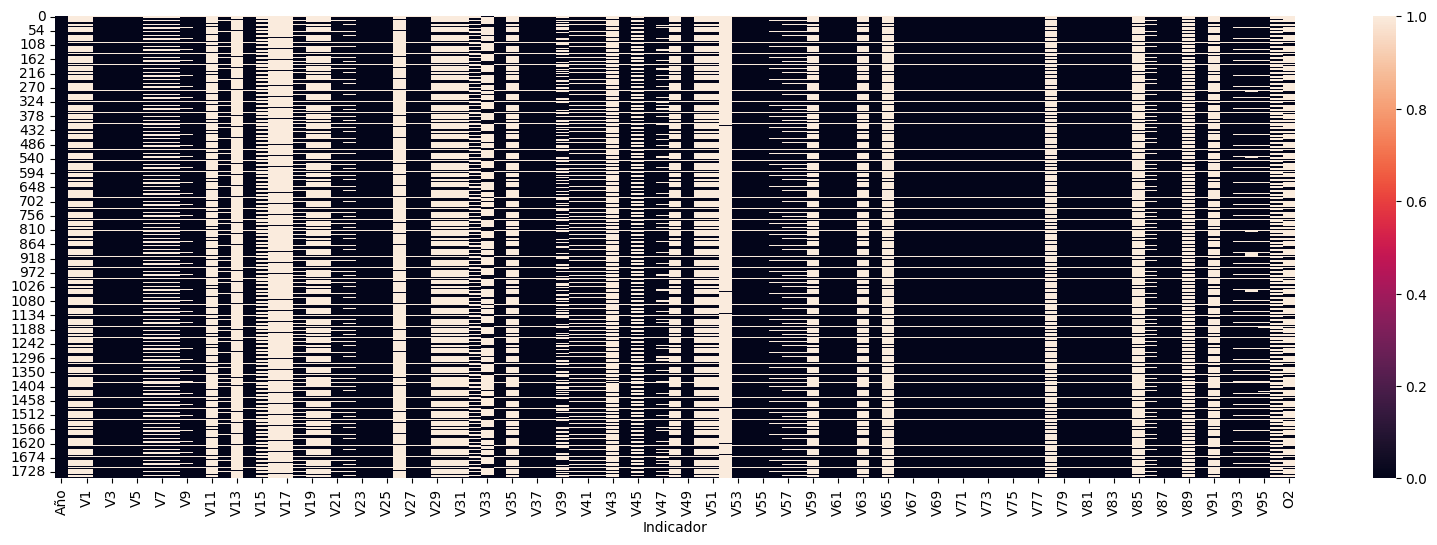

In [11]:
# Establecer el tamaño de la figura
plt.figure(figsize=(20, 6))
sns.heatmap(df_numeric.isnull())
plt.show()

In [12]:
df_numeric=df_numeric.drop(index = [1387,1388])
df_numeric=df_numeric.drop(columns=['V52'])

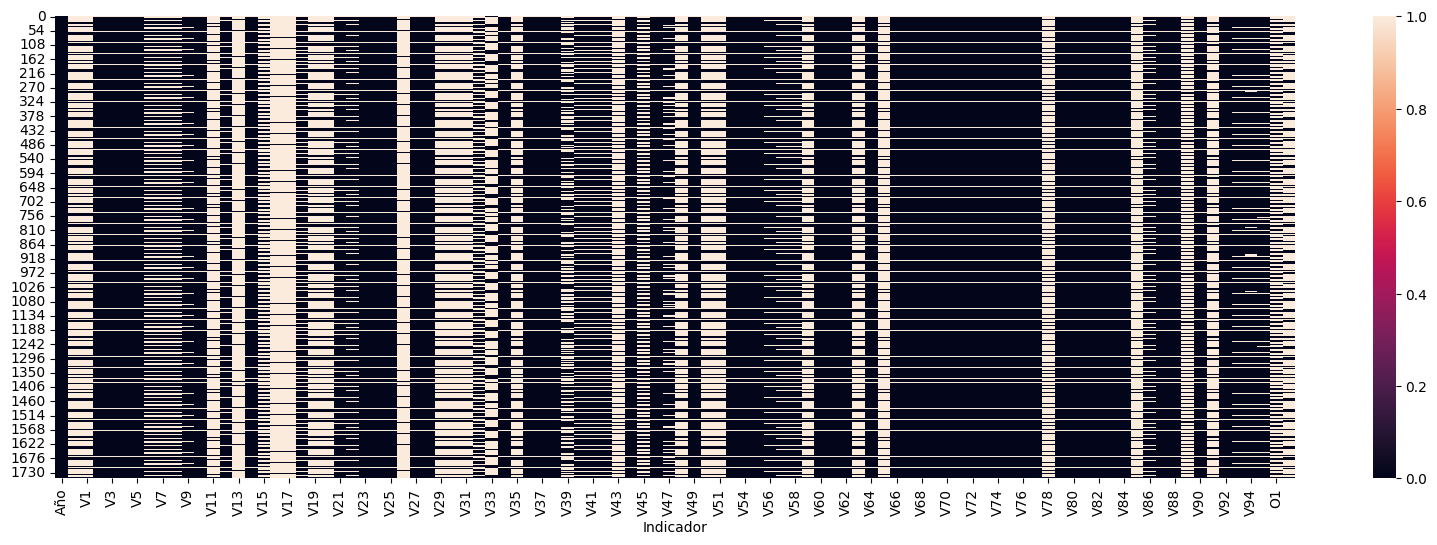

In [13]:
# Establecer el tamaño de la figura
plt.figure(figsize=(20, 6))
sns.heatmap(df_numeric.isnull())
plt.show()

In [14]:
df_numeric_NaN_count = df_numeric.isna().sum(axis=1)
df_numeric_FilamasNaN = df_numeric[df_numeric_NaN_count>93]
print(df_numeric_FilamasNaN)

Indicador   Año  V0  V1  V2  V3  V4  V5  V6  V7  V8  ...  V88  V89  V90  V91  \
0          2007 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
14         2007 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
28         2007 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
42         2007 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
56         2007 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
...         ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   
1683       2007 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
1697       2007 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
1711       2007 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
1725       2007 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
1739       2007 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   

Indicador  V92  V93  V94  V95  O1  O2  

In [15]:
## Inquietud: Es necesario realizar la imputación, separada por año???

# Imputación con un modelo predictivo a partir de los datos vecinos
from sklearn.impute import KNNImputer
# Se construye el modelo para la imputación de la estatura
imputer = KNNImputer(n_neighbors=5, weights="uniform")  # Definir el imputador KNN
df_Imputed=df_numeric

# Variables a imputar V0 a V95
variables_a_imputar = ["V" + str(i) for i in range(0, 96) if i not in [52]] # se excluyen las vbles eliminadas

# Iterar sobre las variables a imputar
for variable in variables_a_imputar:
    # Si la variable tiene valores faltantes
    if df_Imputed[variable].isnull().any():
        # Ajustar y transformar los datos
        df_Imputed[variable] = imputer.fit_transform(df_numeric[[variable]]).ravel()


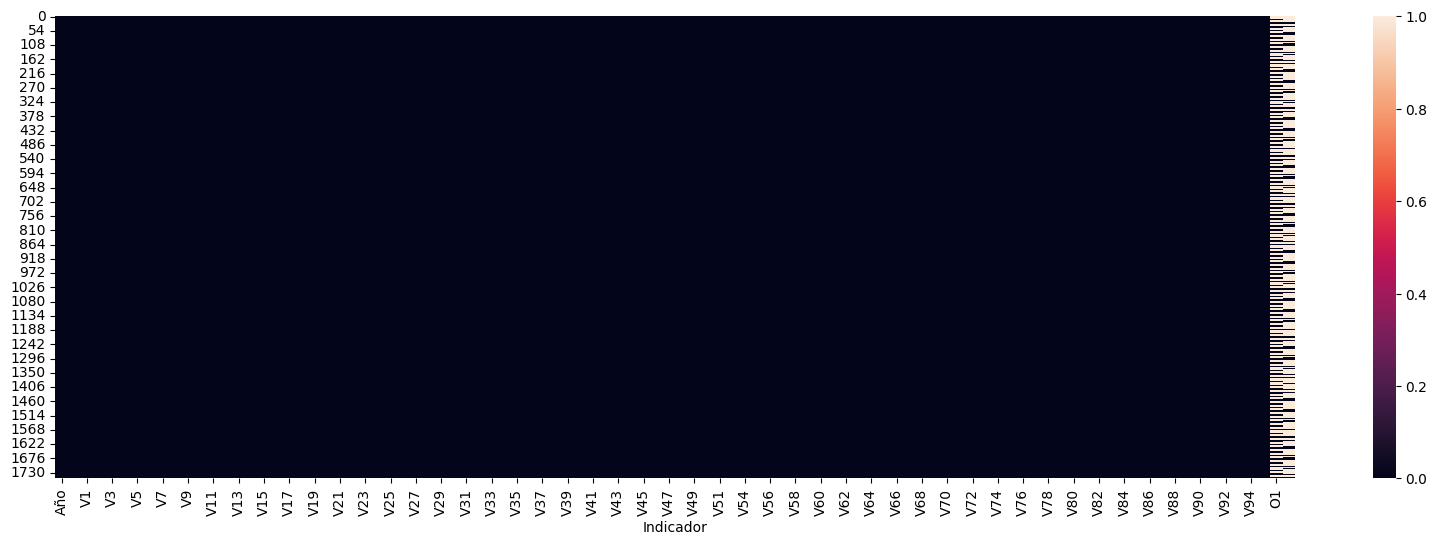

In [16]:
# Establecer el tamaño de la figura
plt.figure(figsize=(20, 6))
sns.heatmap(df_numeric.isnull())
plt.show()

In [ ]:
#Imputar knn, average, subregion, Depto

In [17]:
df_numeric.head(5)['V11']

0    0.378087
1    0.378087
2    0.378087
3    0.378087
4    0.378087
Name: V11, dtype: float64

In [18]:
dictVars['V52']

'Porcentaje de puntos de monitoreo con categoría buena o aceptable del Índice de Calidad de Agua (ICA)'

In [19]:
#*********************************************************************************
#Reducción Dimensional con PCA ***************************************************
#*********************************************************************************
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#import matplotlib.pyplot as plt

# Manejar los valores faltantes
df_numeric_DropNA = df_Imputed.dropna() #Limpoiar en definitiva
df_numeric_DropNA.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Indicador,,,,,,,,
Año,375.0,2019.000000,1.635175,2017.000000,2017.000000,2019.000000,2021.000000,2021.000000
V0,375.0,9.080870,23.922946,-155.116244,0.308870,11.421930,22.432165,64.527276
V1,375.0,1.298111,1.765767,0.000000,0.367440,0.996059,1.594813,19.443506
V2,375.0,27.873366,49.536861,-184.739586,4.523176,26.185205,48.787004,323.683276
V3,375.0,41.121493,169.838367,0.000000,0.000000,0.000000,2.800000,1466.900000
...,...,...,...,...,...,...,...,...
V93,375.0,22.214092,16.929351,0.000000,9.365445,18.913399,33.356410,72.200000
V94,375.0,56.754068,31.157687,0.000000,32.916541,57.100000,86.588304,100.000000
V95,375.0,2.619285,7.318135,0.000000,0.000000,0.400000,2.015000,75.000000


In [20]:
#saber con cuáles años se está trabajando
print(df_numeric_DropNA['Año'].unique())

[2017 2019 2021]


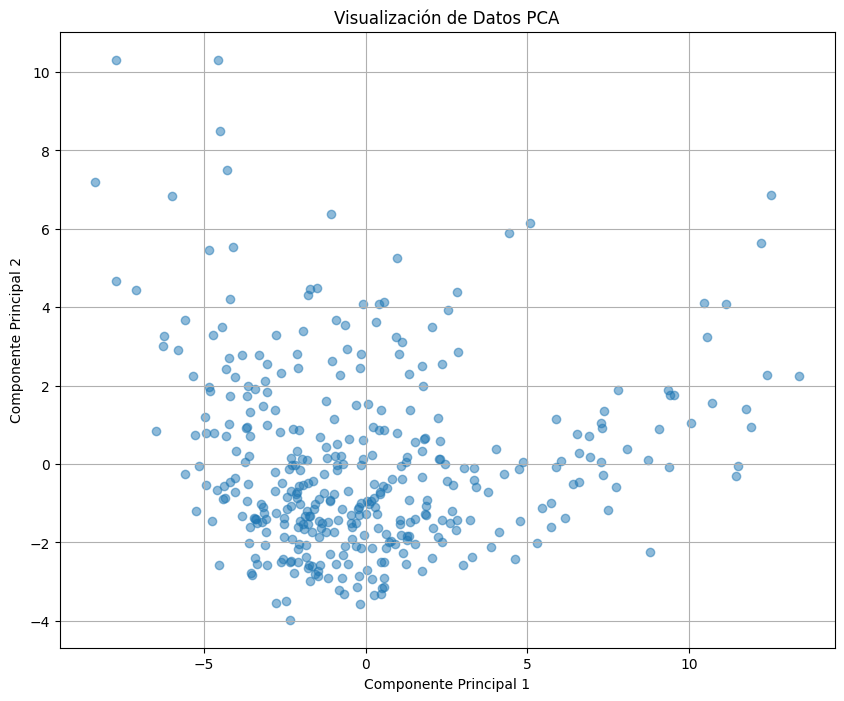

In [21]:

# Seleccionar solo las columnas numéricas a normalizar, excluyendo "Año"
columns_to_normalize = df_numeric_DropNA.drop(columns=['Año'])

# Normalizar los datos seleccionados
scaler = StandardScaler()
df_numeric_normalized = scaler.fit_transform(columns_to_normalize)

# Aplicar PCA con 4 componentes principales
pca = PCA(n_components=4)
principal_components = pca.fit_transform(df_numeric_normalized)

# Crea un DataFrame con los componentes principales y la variable "Año"
df_pca = pd.DataFrame(data=principal_components, columns=['Componente principal 1', 'Componente principal 2', 'Componente principal 3', 'Componente principal 4'])
df_pca['Año'] = df_numeric_DropNA['Año']

# Visualizar los datos en un gráfico de dispersión
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['Componente principal 1'], df_pca['Componente principal 2'], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Datos PCA')
plt.grid(True)
plt.show()

#color escala de azul a rojo, val O1 ó O2
#visualizar componentes
# usar rangos, en las vbles de salida, etiquetas o similar

In [22]:
# Obtén la proporción de varianza explicada por cada componente principal, para verificar si se debe ajustar el # de componentes principales
variance_explained = pca.explained_variance_ratio_

# Imprime la proporción de varianza explicada para cada componente principal
for i, var in enumerate(variance_explained):
    print(f"Componente principal {i + 1}: {var:.4f}")

Componente principal 1: 0.1690
Componente principal 2: 0.0587
Componente principal 3: 0.0380
Componente principal 4: 0.0341


# Lectura y visualización del conjunto de datos

In [ ]:
# Selección del nombre del indicador para su visualización gráfica
nomindicador = dataset['Indicador']

# Calcular el conteo de cada indicador y asignar valores para su viasualización
conteo_nomindicador = Counter(nomindicador)
categorias = list(conteo_nomindicador.keys())
valores = list(conteo_nomindicador.values())

# Gráfico de barras con el conteo de registros para cada indicador
plt.bar(categorias, valores, color = 'green')
plt.xlabel('Nombre del indicador')
plt.ylabel('Total registros')
plt.title('Conteo de instancias según nombre del Indicador')
plt.xticks(rotation = 90, ha = 'right')
for i, valor in enumerate(valores): # Etiquetas para cada indicador
    plt.text(i, valor + 0.1, str(valor), ha = 'center', va = 'bottom')
plt.show()


**El gráfico de barras permite observar la magnitud del número de registros como un balanceo del conjunto de datos dentro de sus categorías de interés, en este caso para cada indicador con mediciones para los municipios del departamento de Antioquia.**

**Se evidencia mayor magnitud de registros para el indicador de cobertura en educación superior, cobertura de agua potable y energía eléctrica, menos cantidad de registros se observan para los indicadores de desnutrición e inseguridad alimentaria.**

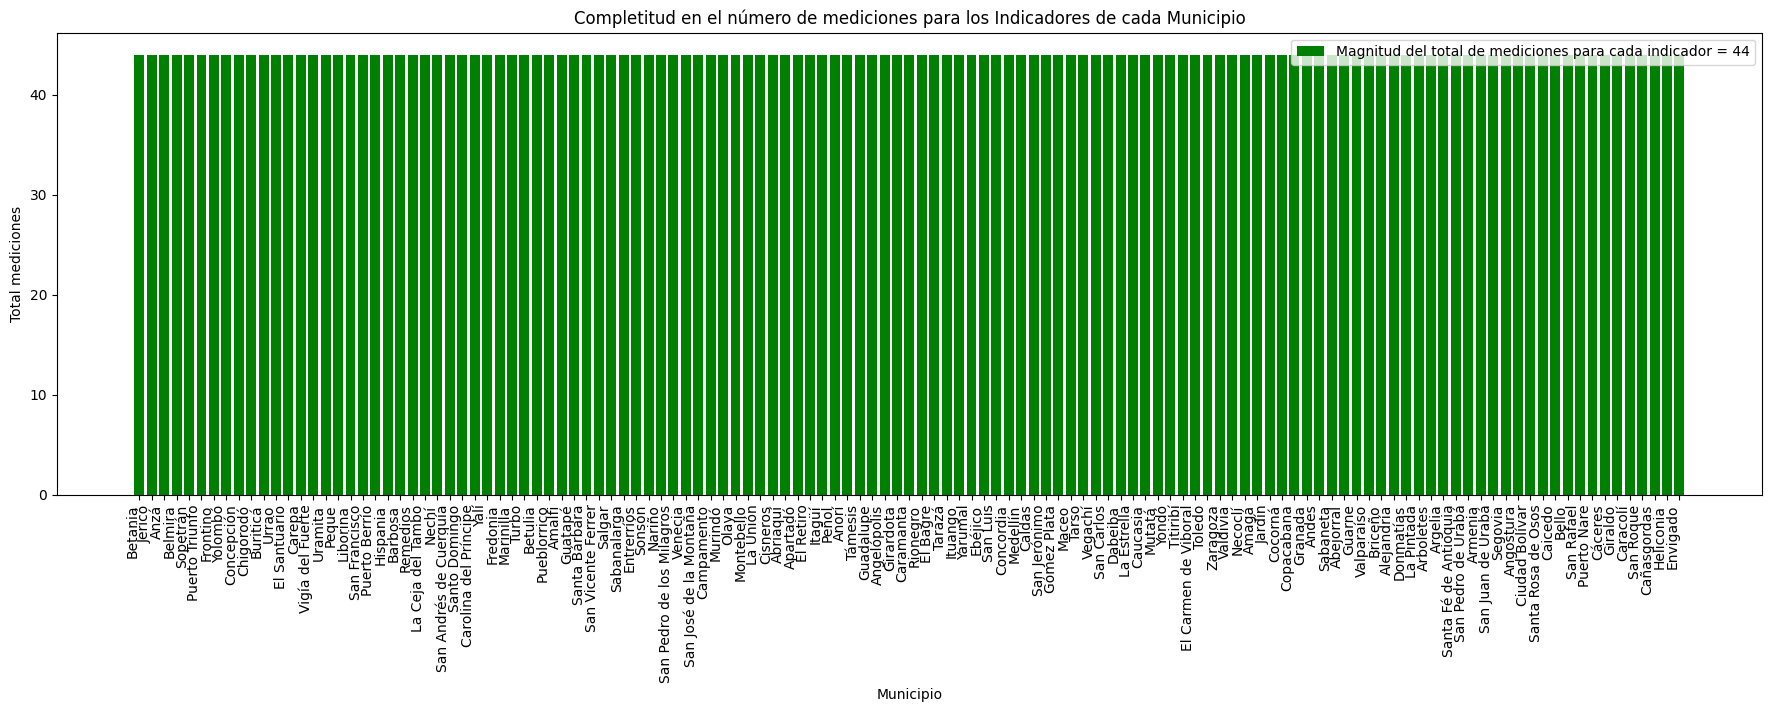

In [ ]:
# Selección del nombre del municipio para su visualización gráfica
categorias = dataset['Entidad']

# Calcular el conteo de cada indicador (número de mediciones) y asignar valores para su viasualización
conteo_categorias = Counter(categorias)
df = pd.DataFrame(list(conteo_categorias.items()), columns = ['Municipio', 'Total mediciones'])

# Gráfico de barras con el conteo de registros para cada indicador
plt.figure(figsize = (22, 6))
barra = plt.bar(df['Municipio'], df['Total mediciones'], color = 'green', label = 'Magnitud del total de mediciones para cada indicador = 44')
plt.xlabel('Municipio')
plt.ylabel('Total mediciones')
plt.title('Completitud en el número de mediciones para los Indicadores de cada Municipio')
plt.xticks(rotation = 90, ha = 'right')  # Ajusta el ángulo y la alineación según tus preferencias
plt.legend(loc = 'upper right')  # Ubicación de la leyenda
plt.show()

**Se observa completitud en los datos para los 125 municipios que contienen las mediciones de los indicadores de desnutrición e inseguridad alimentaria, cobertura en educación superior, agua potable y energía eléctrica para los años de estudio.**

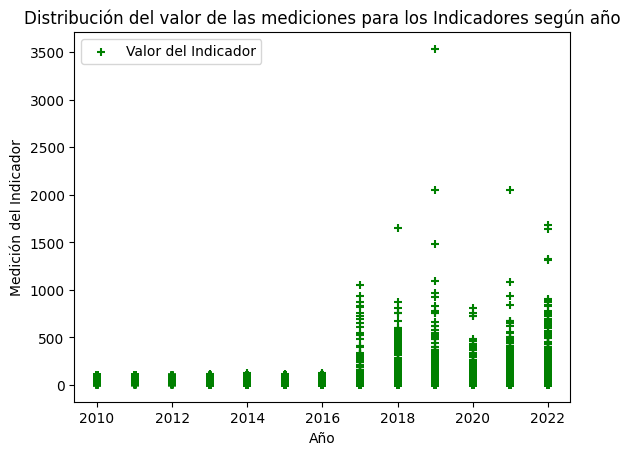

In [ ]:
# Datos de ejemplo (reemplázalos con tus propios datos)
x = dataset['Año']
y = dataset['Valor']

# Gráfico de dispersión con la identificación del año y la distribución del valor de las mediciones para los Indicadores
plt.scatter(x, y, color = 'green', marker = '+', label = 'Valor del Indicador')
plt.xlabel('Año')
plt.ylabel('Medición del Indicador')
plt.title('Distribución del valor de las mediciones para los Indicadores según año')
plt.legend()
plt.show()


**Al visualizar las mediciones de los valores de los diferentes indicadores con el año de estudio, se evidencia mediciones más altas en los años de 2017 a 2022, los cuales advierten una exploración más profunda de su comportamiento para dar solución óptima y significativa al objetivo del proyecto.**

# Exportación del conjunto de datos

In [ ]:
# Se exportan los datos estructurados en el dataset como un arcvhivo plano CSV

dataset.to_csv('dataset_municipios-DN.csv')
files.download('dataset_municipios-DN.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Al exportar y obtener este nuevo conjunto de datos, se logra avanzar en el objetivo que finalmente pretende la definición de un modelo predictivo que permita la categorización de la desnutrición e inseguridad alimentaria para los municipios del departamento de Antioquia.**